In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MahmoudNabil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df0 = pd.read_csv('2021_May_twitter_trending_data.csv')
df0

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
0,1396861171894943752,2021-05-24 16:10:30,AstraZenaca,en,13,Twitter for iPhone,http://twitter.com/download/iphone,RT @14luxor: @beer_nun With political and comm...,2009-03-12 05:38:12,Gibbsy,1720,"Teacher, mother, still a hippie at heart & alw...",Sydney Australia,#4corners,2021-05-24 16:10:20.845908,Australia
1,1396861133034639360,2021-05-24 16:10:21,NaN,en,0,Twitter for Android,http://twitter.com/download/android,"It starts and end with you, Brendan Murphy. Yo...",2015-12-12 03:56:35,Chris Lancashire,2863,Author #BeyondCourage: Memoir of my son #Andre...,NaN,#4corners,2021-05-24 16:10:20.845908,Australia
2,1396860881191915522,2021-05-24 16:09:21,NaN,en,36,Twitter for iPad,http://twitter.com/#!/download/ipad,RT @james00000001: If domestic production of v...,2009-07-01 01:51:23,Jacqueline Lee Lewes,2300,Journalist once. Unionist. Feminist. Howling m...,NaN,#4corners,2021-05-24 16:10:20.845908,Australia
3,1396860808076795908,2021-05-24 16:09:03,NaN,en,46,Twitter for Android,http://twitter.com/download/android,RT @PRGuy17: Instead of hiring and consulting ...,2020-10-05 08:58:43,🕯🐀Debbie Bella 🐭 Proud Sewer Rat🐁 🕯,345,#IStandWithDanAndrews and #IStandWithBrett\n#I...,Eagle Point,#4corners,2021-05-24 16:10:20.845908,Australia
4,1396860638400368643,2021-05-24 16:08:23,"4Corners, auspol",en,10,Twitter for Android,http://twitter.com/download/android,RT @deniseshrivell: How's the mainstream media...,2011-10-29 11:40:54,🐕🐱🦅🌏🏝 ResistenceinOzWendy Ellliott,1911,"Animal Rights, Business Development, Community...","Queensland, Australia",#4corners,2021-05-24 16:10:20.845908,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45307,1399194696019288065,2021-05-31 02:43:05,NaN,en,0,Twitter for iPhone,http://twitter.com/download/iphone,9 minute powerplay. Hope Colorado scores 2+ on...,2021-05-25 00:02:34,Kevin Bieksa Hot Takes,8,Not Kevin Bieksa clearly. Twitter tried bannin...,Not Sportsnet Studio,#GoAvsGo,2021-05-31 02:45:42.868805,United States
45308,1399194680701632512,2021-05-31 02:43:02,GoAvsGo,en,0,Twitter for iPhone,http://twitter.com/download/iphone,A 9 minute PowerPlay has been given to #GoAvsG...,2013-04-14 03:46:29,Jared Wood,702,#ALLCAPS,NaN,#GoAvsGo,2021-05-31 02:45:42.868805,United States
45309,1399194666495578112,2021-05-31 02:42:58,GoAvsGo,en,0,Twitter for iPhone,http://twitter.com/download/iphone,Reaves better be suspended but because the lea...,2017-02-10 01:12:53,jay 🐝 BLACK MIRROR SOTY🥂,134,"I love women and atz. atiny, miya-ne and tomoo...","she/her, 21, bi",#GoAvsGo,2021-05-31 02:45:42.868805,United States
45310,1399194664851279875,2021-05-31 02:42:58,GoAvsGo,en,2,Twitter for iPhone,http://twitter.com/download/iphone,RT @COSportsNut13: We want Tacos too Bernie!!!...,2020-05-03 02:57:52,JonKayMHH,815,Producer for Mile High Huddle | an @SINow chan...,"Centennial, CO",#GoAvsGo,2021-05-31 02:45:42.868805,United States


In [3]:
df=df0[['tweet_text']][0:20000]
df

,tweet_text
0,RT @14luxor: @beer_nun With political and comm...
1,"It starts and end with you, Brendan Murphy. Yo..."
2,RT @james00000001: If domestic production of v...
3,RT @PRGuy17: Instead of hiring and consulting ...
4,RT @deniseshrivell: How's the mainstream media...
...,...
19995,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...
19996,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...
19997,"RT @VanilleLouise: @acadmed Quand 1""vaccin"" n'..."
19998,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...


In [4]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [5]:
cleantext=[]
for item in tqdm(df['tweet_text']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext
df

100%|██████████| 20000/20000 [01:26<00:00, 230.49it/s]


,tweet_text,cleantext
0,RT @14luxor: @beer_nun With political and comm...,"[rt, 14luxor, beer, nun, polit, commerci, affi..."
1,"It starts and end with you, Brendan Murphy. Yo...","[start, end, brendan, murphi, doctor, feder, h..."
2,RT @james00000001: If domestic production of v...,"[rt, james00000001, domest, product, vaccin, i..."
3,RT @PRGuy17: Instead of hiring and consulting ...,"[rt, prguy17, instead, hire, consult, real, do..."
4,RT @deniseshrivell: How's the mainstream media...,"[rt, deniseshrivel, mainstream, media, go, spi..."
...,...,...
19995,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...,"[rt, martinewonn, 2, 2, directan, le, dg, adjo..."
19996,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...,"[rt, martinewonn, 2, 2, directan, le, dg, adjo..."
19997,"RT @VanilleLouise: @acadmed Quand 1""vaccin"" n'...","[rt, vanillelouis, acadm, quand, 1, vaccin, n,..."
19998,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...,"[rt, martinewonn, 2, 2, directan, le, dg, adjo..."


In [6]:
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [7]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    return df

In [8]:
df2 = compute_vader_scores(df,'cleantext')
df2

,tweet_text,cleantext,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2
0,RT @14luxor: @beer_nun With political and comm...,"[rt, 14luxor, beer, nun, polit, commerci, affi...",0.0,1.000,0.000,0.0000,rt 14luxor beer nun polit commerci affili astr...
1,"It starts and end with you, Brendan Murphy. Yo...","[start, end, brendan, murphi, doctor, feder, h...",0.0,1.000,0.000,0.0000,start end brendan murphi doctor feder health s...
2,RT @james00000001: If domestic production of v...,"[rt, james00000001, domest, product, vaccin, i...",0.0,1.000,0.000,0.0000,rt james00000001 domest product vaccin import ...
3,RT @PRGuy17: Instead of hiring and consulting ...,"[rt, prguy17, instead, hire, consult, real, do...",0.0,1.000,0.000,0.0000,rt prguy17 instead hire consult real doctor mo...
4,RT @deniseshrivell: How's the mainstream media...,"[rt, deniseshrivel, mainstream, media, go, spi...",0.0,1.000,0.000,0.0000,rt deniseshrivel mainstream media go spin igno...
...,...,...,...,...,...,...,...
19995,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...,"[rt, martinewonn, 2, 2, directan, le, dg, adjo...",0.0,1.000,0.000,0.0000,rt martinewonn 2 2 directan le dg adjoint de l...
19996,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...,"[rt, martinewonn, 2, 2, directan, le, dg, adjo...",0.0,1.000,0.000,0.0000,rt martinewonn 2 2 directan le dg adjoint de l...
19997,"RT @VanilleLouise: @acadmed Quand 1""vaccin"" n'...","[rt, vanillelouis, acadm, quand, 1, vaccin, n,...",0.0,1.000,0.000,0.0000,rt vanillelouis acadm quand 1 vaccin n emp che...
19998,RT @MartineWonner: 2/2 🟠 #DirectAN : Le DG adj...,"[rt, martinewonn, 2, 2, directan, le, dg, adjo...",0.0,1.000,0.000,0.0000,rt martinewonn 2 2 directan le dg adjoint de l...


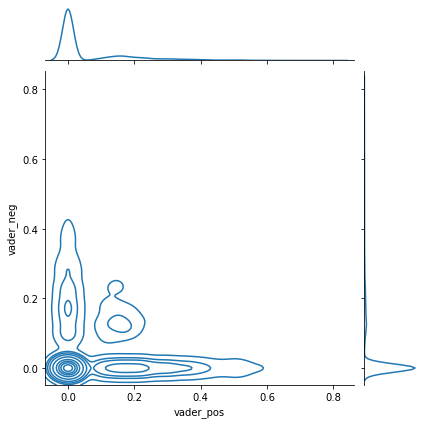

In [9]:
sns.jointplot(data=df2, x='vader_pos', y='vader_neg', kind="kde")

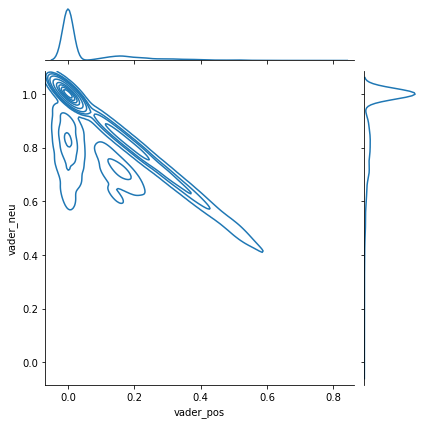

In [10]:
sns.jointplot(data=df2, x='vader_pos', y='vader_neu', kind="kde")

In [11]:
class0=[]
for i in range(len(df2)):
    if df2.loc[i,'vader_neg']>0:
        class0+=[0]
    elif df2.loc[i,'vader_pos']>0:
        class0+=[2]        
    else:
        class0+=[1]   

In [12]:
df['class']=class0
df['class'].value_counts()

1    12284
2     4362
0     3354
Name: class, dtype: int64

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(df['cleantext2'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 rt 14luxor beer nun polit commerci affili astrazenaca lnp bulli coerc mo 
After Tokenization & Padding 
 [   1 4565 2783 1397 1944 3403  768    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [14]:
print(X.shape)

(20000, 50)


In [15]:
y = pd.get_dummies(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (12000, 50) (12000, 3)
Validation Set:  (4000, 50) (4000, 3)
Test Set:  (4000, 50) (4000, 3)


In [16]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [18]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8`

In [19]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [21]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [22]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [23]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

Epoch 1/10
188/188 [==============================] - 8s 17ms/step - loss: 0.9284 - accuracy: 0.6119 - precision: 0.6135 - recall: 0.5955 - val_loss: 0.9145 - val_accuracy: 0.6112 - val_precision: 0.6112 - val_recall: 0.6112
Epoch 2/10
188/188 [==============================] - 2s 11ms/step - loss: 0.8934 - accuracy: 0.6133 - precision: 0.6362 - recall: 0.5507 - val_loss: 0.8872 - val_accuracy: 0.6112 - val_precision: 0.6362 - val_recall: 0.5890
Epoch 3/10
188/188 [==============================] - 2s 12ms/step - loss: 0.8686 - accuracy: 0.6141 - precision: 0.6715 - recall: 0.5419 - val_loss: 0.8711 - val_accuracy: 0.6112 - val_precision: 0.6395 - val_recall: 0.6085
Epoch 4/10
188/188 [==============================] - 2s 12ms/step - loss: 0.8408 - accuracy: 0.6217 - precision: 0.7126 - recall: 0.5293 - val_loss: 0.8357 - val_accuracy: 0.6115 - val_precision: 0.7196 - val_recall: 0.5325
Epoch 5/10
188/188 [==============================] - 2s 12ms/step - loss: 0.8070 - accuracy: 0.6417

In [24]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7345
Precision : 0.8132
Recall    : 0.6062
F1 Score  : 0.6946


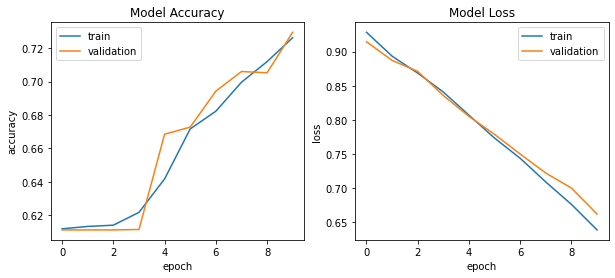

In [25]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1    2479
2     878
0     643
dtype: int64
1    3105
2     706
0     189
dtype: int64


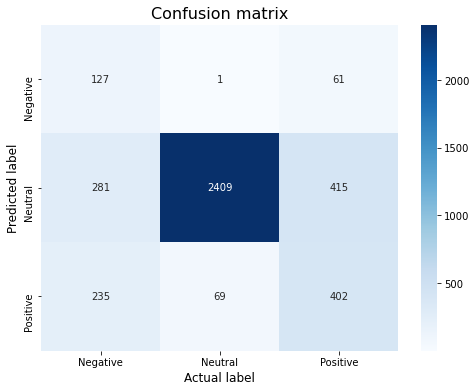

In [26]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)